In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings

In [2]:
births = Table.read_table('baby.csv')
births.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


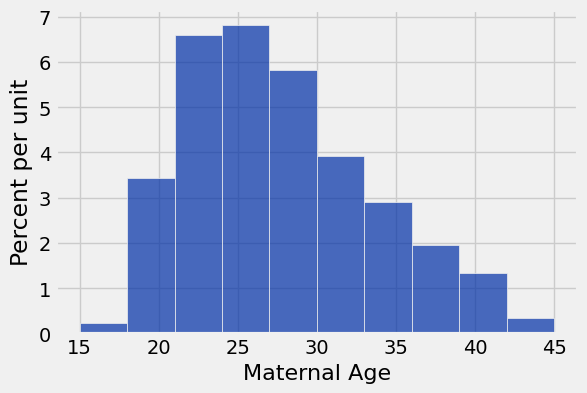

In [3]:
births.hist('Maternal Age')

In [4]:
np.mean(births.column('Maternal Age'))

27.228279386712096

### Question
What is the mean age of the mothers in the population?

# Bootstrap Method
Step 1: Write a function that simulates a new sample (with replacement) of the same size as the original
    and compute the mean.

Step 2: Run this function many times and collect all the simulated means.

Step 3: Generate a histogram to visualize the distribution of the means.

Step 4: Find a 95% confidence interval in the distribution.

# Step 1: Resample and Mean

In [ ]:
# Use sample() to generate a new sample (with replacement) of the same size as the original
# Return the average
def one_bootstrap_mean():
    sim_sample=births.sample()
    ages=sim_sample.column("Maternal Age")
    mean_age=np.mean(ages)
    return mean_age

In [15]:
one_bootstrap_mean()

27.415672913117547

# Step 2: Simulate many times

In [17]:
# Generate means from 3000 bootstrap samples
# Store all the simulated averages in bstrap_means
bstrap_means = make_array()
for i in np.arange(3000):
    sim_mean=one_bootstrap_mean()
    bstrap_means=np.append(bstrap_means,sim_mean)
bstrap_means


array([ 27.26916525,  27.25809199,  26.98211244, ...,  27.17376491,
        27.44889267,  27.65587734])

# Step 3: Visualize distribution of simulated means

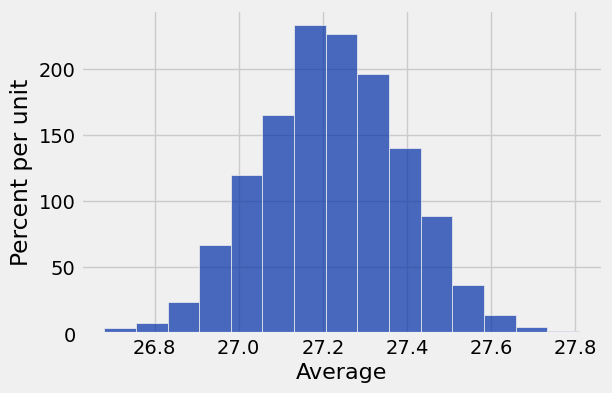

In [18]:
# Load the averages into a table using with_column.
# Generate a histogram with 15 bins.
Table().with_column('Average',bstrap_means).hist('Average',bins=15)

# Step 4: Find 95% Confidence Interval

In [ ]:
# Use the percentile function to find the 2.5 percentile and the 97.5 percentile (which leaves us 
# with the middle 95% confidence interval)
# Store these values in the variables "left" and "right", respectively
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

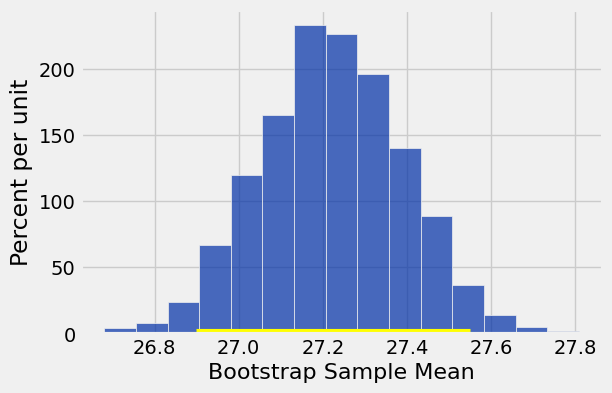

In [20]:
means_table = Table().with_columns('Bootstrap Sample Mean', bstrap_means)
means_table.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);